In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import datetime
import random
import time
import math
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Importing Data 
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
df.shape

(891, 12)

In [122]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

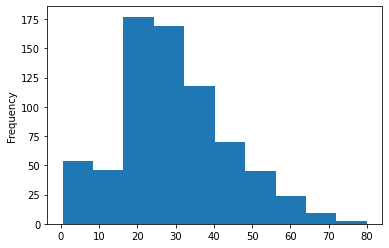

In [123]:
df.Age.plot.hist()

In [124]:
data=df

In [125]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
data['Died'] = 1 - data['Survived']

In [127]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<AxesSubplot:xlabel='Sex'>

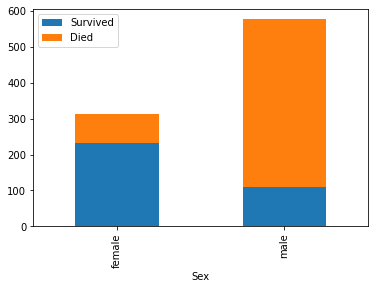

In [128]:
data.groupby("Sex").agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex'>

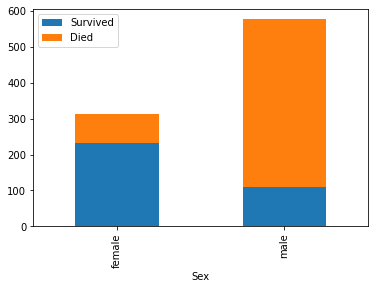

In [129]:
data.groupby("Sex").agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

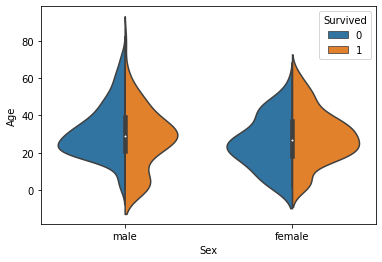

In [130]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True)

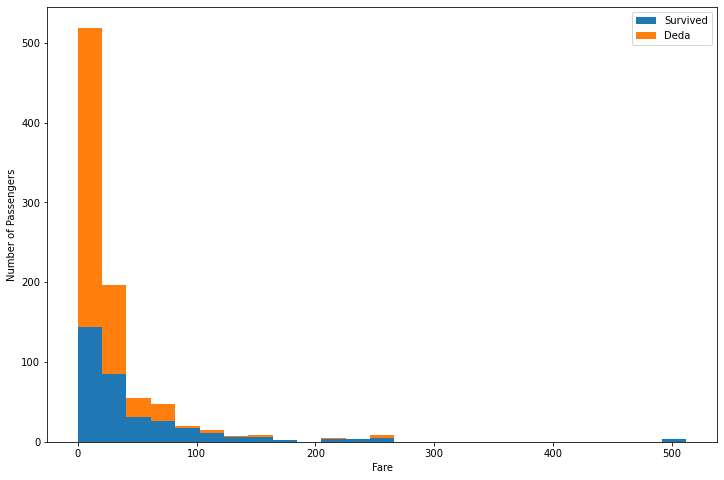

In [131]:
figure = plt.figure(figsize=(12,8))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
         stacked = True,
         bins = 25, 
         label = ['Survived', 'Deda'])

plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

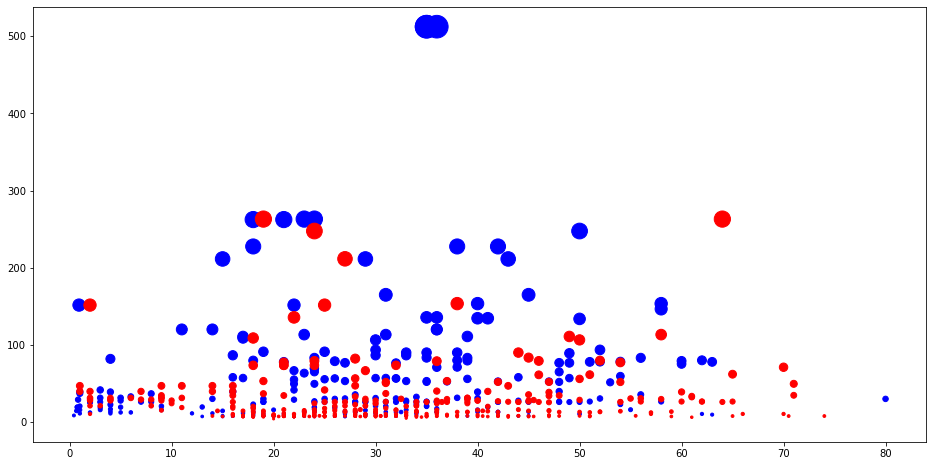

In [83]:
 #Combining age, fare and survivor

plt.figure(figsize=(16, 8))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'],
           c = 'blue', s = data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],
           c = 'red', s = data[data['Survived'] == 0]['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Average fare'>

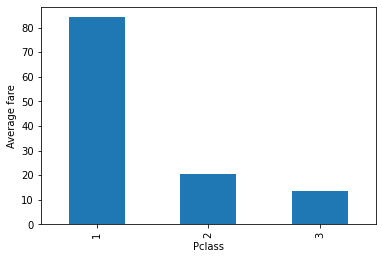

In [106]:
# Ticket fare versus class

ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax=ax)

In [95]:
#to_show_null_data(Age and cabin embarked)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
df_new = pd.DataFrame()

In [116]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Died             int64
dtype: object

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


0    549
1    342
Name: Survived, dtype: int64


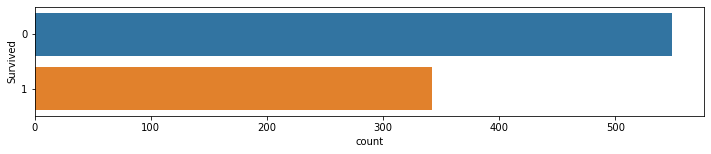

In [207]:
# How many survived?
fig = plt.figure(figsize=(12, 2))
sns.countplot(y='Survived', data=df)
print(df.Survived.value_counts())

In [209]:
df_new['Survived'] = df['Survived']
df_new.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


In [53]:
def train_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

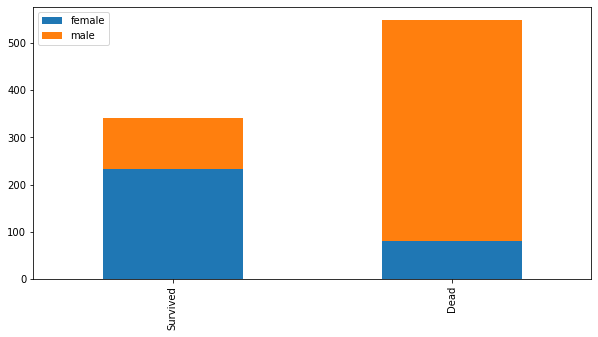

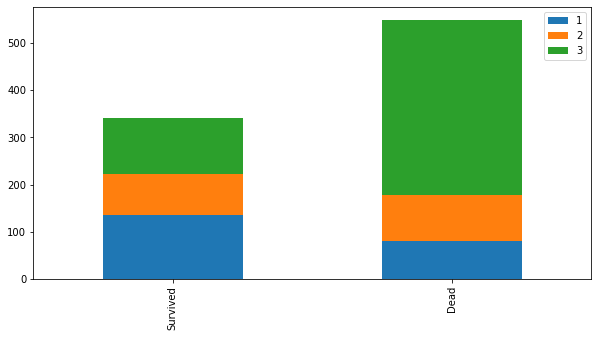

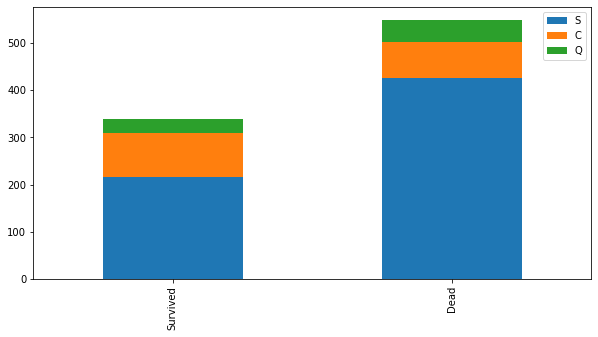

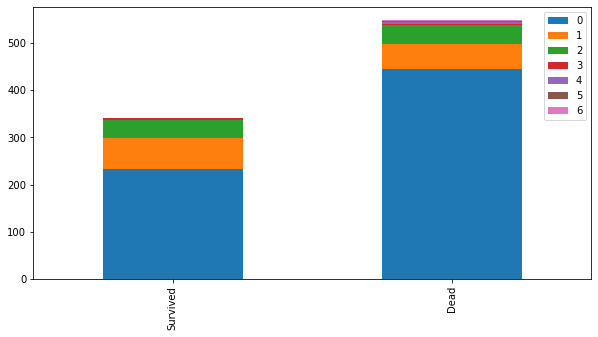

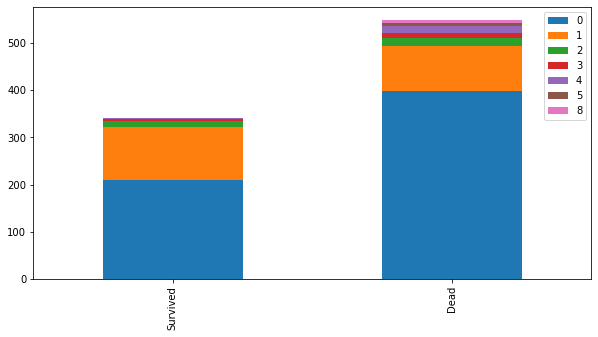

In [64]:
train_chart('Sex')
train_chart('Pclass')
train_chart('Embarked')
train_chart('Parch')
train_chart('SibSp')


In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


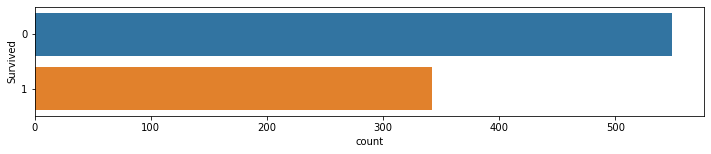

In [137]:
# How many survived?
fig = plt.figure(figsize=(12, 2))
sns.countplot(y='Survived', data=df)
print(df.Survived.value_counts())

In [138]:
df_new['Survived'] = df['Survived']
df_new.head()

,Survived
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

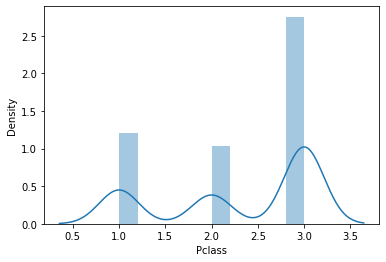

In [139]:
sns.distplot(df.Pclass)

In [140]:
df.Pclass.isnull().sum()

0

In [141]:
df_new['Pclass'] = df['Pclass']

In [142]:
df.Name.value_counts()

Fahlstrom, Mr. Arne Jonas                                   1
Hanna, Mr. Mansour                                          1
Vande Velde, Mr. Johannes Joseph                            1
Patchett, Mr. George                                        1
Hendekovic, Mr. Ignjac                                      1
                                                           ..
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)    1
Glynn, Miss. Mary Agatha                                    1
Carter, Rev. Ernest Courtenay                               1
Graham, Mrs. William Thompson (Edith Junkins)               1
Leeni, Mr. Fahim ("Philip Zenni")                           1
Name: Name, Length: 891, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sex'>

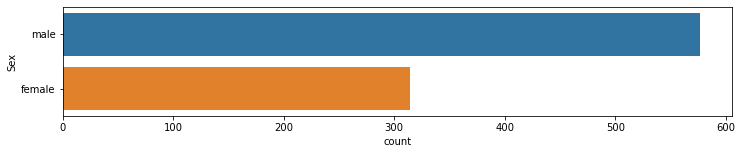

In [143]:
plt.figure(figsize=(12,2))
sns.countplot(y='Sex', data=df)

In [144]:
df.Sex.isnull().sum()

0

In [145]:
df_new['Sex'] = df['Sex']
df_new.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [146]:
df_new['Sex'] = LabelEncoder().fit_transform(df_new['Sex'])
df_new.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


<AxesSubplot:xlabel='Sex', ylabel='Density'>

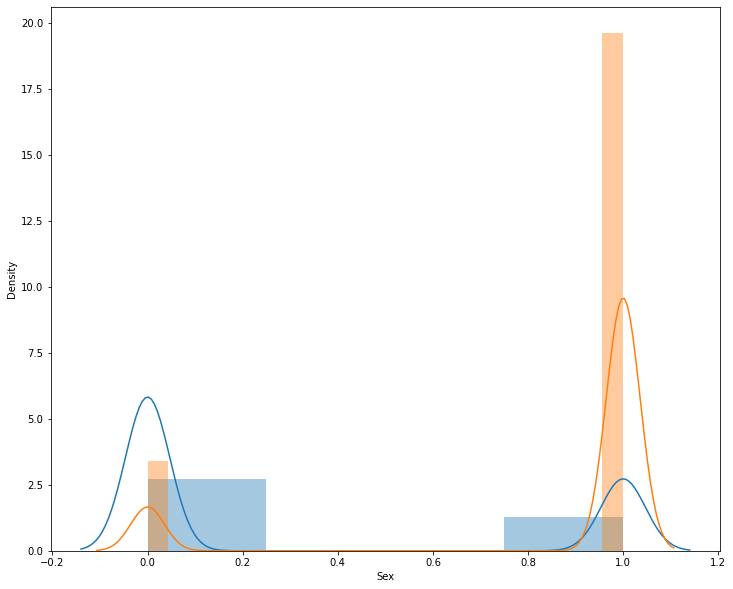

In [147]:
fig = plt.figure(figsize=(12,10))
sns.distplot(df_new.loc[df_new['Survived'] == 1]['Sex'], kde_kws={'bw_method': 0.1, "label":"Survived"})
sns.distplot(df_new.loc[df_new['Survived'] == 0]['Sex'], kde_kws={'bw_method': 0.1, "label":"Died"})

In [148]:
df.Age.isnull().sum()

177

There about 177 missing values, it better to skip it first

In [149]:
# Function to make easier distploting the graph
def plot_count_dist(data, label_column, target_column, figsize=(12, 4)):
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=data)
    plt.subplot(1, 2, 2)
    sns.distplot(data.loc[data[label_column] == 1][target_column],
                kde_kws={'bw_method':0.2, "label":"Survived"})
    sns.distplot(data.loc[data[label_column] == 0][target_column],
                kde_kws={'bw_method':0.2, "label":"Died"})

In [150]:
df.SibSp.isnull().sum()

0

In [151]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

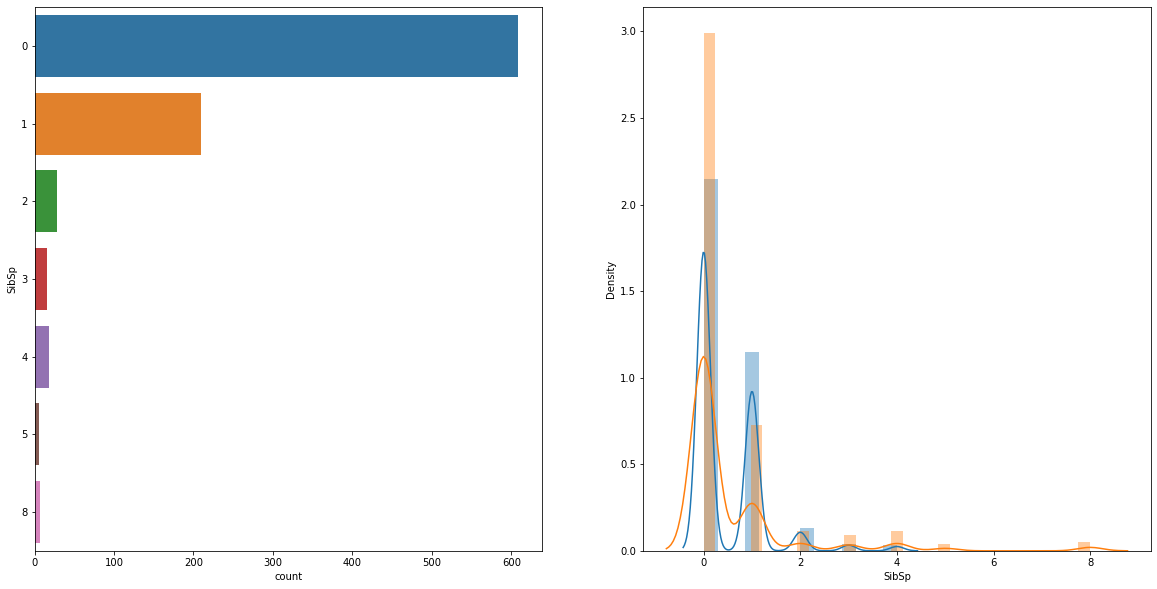

In [153]:
plot_count_dist(df, label_column='Survived', target_column='SibSp', figsize=(20,10))

In [154]:
df_new['SibSp'] = df['SibSp']

In [155]:
df.Parch.isnull().sum()

0

In [156]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

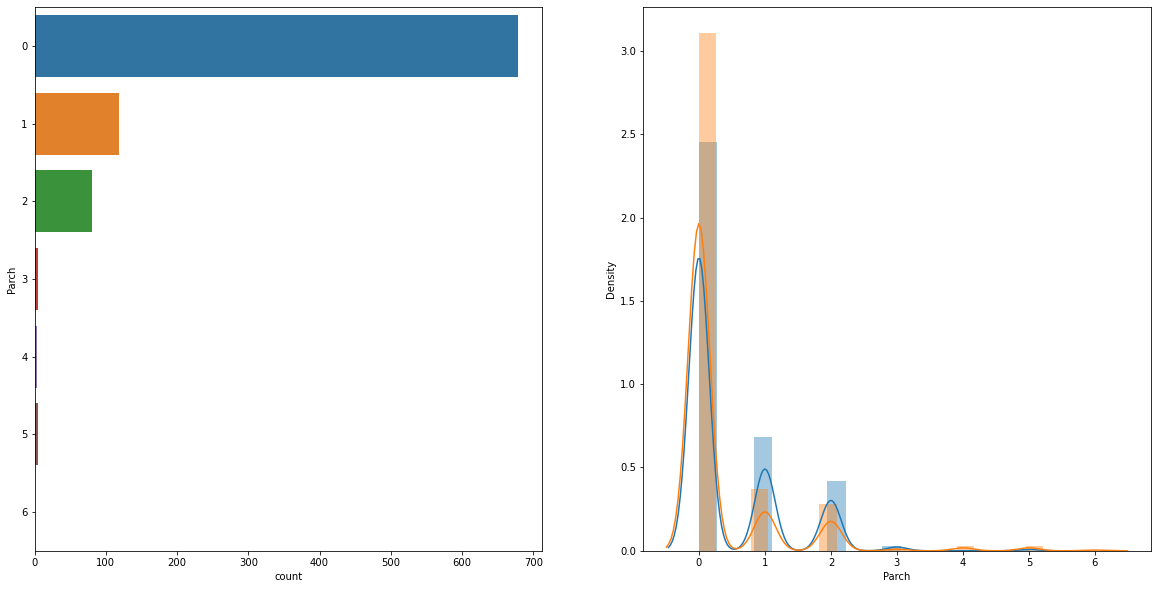

In [157]:
plot_count_dist(df, label_column='Survived', target_column='Parch', figsize=(20,10))

In [158]:
df_new['Parch'] = df['Parch']

In [159]:
df.Ticket.isnull().sum()

0

In [160]:
df.Ticket.value_counts()

1601                7
CA. 2343            7
347082              7
3101295             6
347088              6
                   ..
14973               1
347064              1
365222              1
111427              1
SOTON/OQ 3101316    1
Name: Ticket, Length: 681, dtype: int64

There about 681 different values, so let's skip it

In [161]:
#Fare
df.Fare.isnull().sum()
df.Fare.dtype

dtype('float64')

In [162]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

There are 248 different vlaues, but it's a numerical continious variable, so let include it into data frame

In [163]:
df_new['Fare'] = df['Fare']

In [164]:
#Cabin
df.Embarked.isnull().sum()

2

There are two missing values, let's see

In [165]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

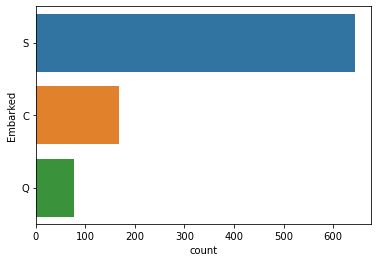

In [166]:
sns.countplot(y='Embarked', data=df)

Because only two, let's added into the dataframe and then remove it

In [167]:
df_new['Embarked'] = df['Embarked']

In [168]:
len(df_new)

891

In [169]:
df_new = df_new.dropna(subset=['Embarked'])

In [170]:
len(df_new)

889

In [ ]:
Feature Encoding-Applied technique to features convert into numerical form

In [171]:
df_new.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


In [172]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_new['Embarked'],
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_new['Sex'],
                                prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_new['Pclass'],
                                   prefix='pclass')

In [173]:
# Combine the one hot encoded columns with df_con_enc
df_new_enc = pd.concat([df_new,
                        df_embarked_one_hot,
                        df_sex_one_hot,
                        df_pclass_one_hot], axis = 1)

# Drop the original columns
df_new_enc = df_new_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [174]:
df_new_enc

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,0,0,30.0000,1,0,0,0,1,1,0,0


Building Machine Learning Models

In [175]:
selected_df = df_new_enc
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [176]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived


In [178]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_model(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation
    train_predict = model_selection.cross_val_predict(algo, X_train,
                                                      y_train, cv=cv,
                                                      n_jobs=-1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_predict) * 100, 2)
    return train_predict, acc, acc_cv


K-Nearest Neighbours

In [192]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_model(KNeighborsClassifier(),
                                                   X_train, y_train, 10)

knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:05.742923


Gaussian Naive Bayes

In [193]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_model(GaussianNB(),
                                                                  X_train, y_train, 10)

gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.208011


Linear Support Vector Machines (SVC)

In [194]:
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_model(LinearSVC(),
                                                   X_train, y_train, 10)

svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 77.84
Accuracy CV 10-Fold: 77.05
Running Time: 0:00:00.686735


Stochastic Gradient Descent

In [195]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_model(SGDClassifier(),
                                                   X_train, y_train, 10)

sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 76.27
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.240038


In [196]:
#Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_model(tree.DecisionTreeClassifier(),
                                                X_train, y_train, 10)

dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.31
Running Time: 0:00:00.288023


In [197]:
#Gradient Boost Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_model(GradientBoostingClassifier(),
                                                   X_train, y_train, 10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.636911


In [198]:
#Accuracy Score
models = pd.DataFrame({
    'Model' : ['KNN', 'Naive Bayes', 'Stochastic Gradient Decent',
               'Linear SVC', 'Decision Tree', 'Gradient Boosting Trees'],
    'Score' : [
        acc_knn, acc_gaussian, acc_sgd,
        acc_svc, acc_dt, acc_gbt]
})

In [199]:
print("Regular Accuracy Scores")
models.sort_values(by='Score', ascending=False)

Regular Accuracy Scores


,Model,Score
4,Decision Tree,92.46
5,Gradient Boosting Trees,86.61
0,KNN,83.46
1,Naive Bayes,78.52
3,Linear SVC,77.84
2,Stochastic Gradient Decent,76.27


In [200]:
#Cross Validation Accuracy Score
cv_models = pd.DataFrame({
    'Model' : ['KNN', 'Naive Bayes', 'Stochastic Gradient Decent',
               'Linear SVC', 'Decision Tree', 'Gradient Boosting Trees'],
    'Score' : [
        acc_cv_knn, acc_cv_gaussian, acc_cv_sgd,
        acc_cv_svc, acc_cv_dt, acc_cv_gbt]
})

In [201]:
print("Cross Validation Accuracy Scores")
cv_models.sort_values(by='Score', ascending=False)

Cross Validation Accuracy Scores


,Model,Score
5,Gradient Boosting Trees,80.65
4,Decision Tree,80.31
1,Naive Bayes,77.95
3,Linear SVC,77.05
0,KNN,76.72
2,Stochastic Gradient Decent,73.68


In [203]:
#submission
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
# loading the test data
testtainData = pd.read_csv('titanic_train.csv')

In [ ]:
# the pipeline will pre-process the raw data and give the final output
model_pipeline.predict(testData)